In [59]:
import pandas as pd
import numpy as np
current_state = np.random.get_state()
np.random.set_state(current_state)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from scipy import stats
from scipy.stats import ttest_ind
import time 
import random

from collections import Counter
from sklearn import ensemble
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, mean_squared_error, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from IPython.display import display
from sklearn.metrics import recall_score

from datetime import datetime
import plotly.plotly as py
import plotly.graph_objs as go



import warnings
warnings.filterwarnings("ignore")

import pandas_datareader.data as web
import datetime as dt
from datetime import date
import re
from sklearn import preprocessing
import scipy.stats  as stats
import matplotlib.pylab as pylab
import mpl_finance as finance

In [2]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
#import data and 
atvi = pd.read_csv(r'C:\Users\Sean\Documents\Thinkful\Video Game Stocks Data\csv\atvi_master_final.csv')
atvi.Date = pd.to_datetime(atvi.Date)
atvi.index = atvi.Date

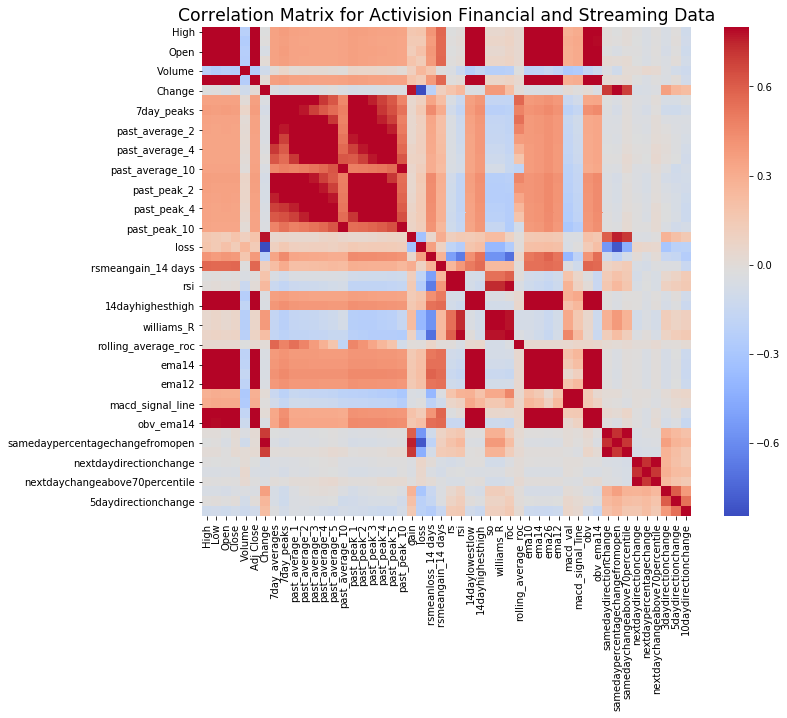

In [5]:
# Make the correlation matrix.
corrmatrix = atvi.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmatrix, vmax=.8, square=True, cmap='coolwarm')
plt.title('Correlation Matrix for Activision Financial and Streaming Data')

plt.show()

In [64]:
print('Top 10 Pearsons Correlations with next day percentage change')
print(corrmatrix['nextdaypercentagechange'].abs().sort_values(ascending= False).head(10))
print('\n')
print('Top 10 Pearsons Correlations with next day direction change')
print(corrmatrix['nextdaydirectionchange'].abs().sort_values(ascending= False).head(10))
print('\n')
print('Top 10 Pearsons Correlations with 3 day direction change')
print(corrmatrix['3daydirectionchange'].abs().sort_values(ascending= False).head(10))
print('\n')
print('Top 10 Pearsons Correlations with 5 day direction change')
print(corrmatrix['5daydirectionchange'].abs().sort_values(ascending= False).head(40))

Top 10 Pearsons Correlations with next day percentage change
nextdaypercentagechange           1.000000
nextdaydirectionchange            0.724679
nextdaychangeabove70percentile    0.715954
3daydirectionchange               0.291675
5daydirectionchange               0.228098
10daydirectionchange              0.219416
rsmeangain_14 days                0.078404
7day_peaks                        0.069720
samedaychangeabove70percentile    0.064980
past_peak_1                       0.063224
Name: nextdaypercentagechange, dtype: float64


Top 10 Pearsons Correlations with next day direction change
nextdaydirectionchange            1.000000
nextdaychangeabove70percentile    0.794506
nextdaypercentagechange           0.724679
3daydirectionchange               0.272137
5daydirectionchange               0.201979
10daydirectionchange              0.166768
so                                0.088976
williams_R                        0.088976
rs                                0.075993
samedaychangea

Of our feature variables the following are all weakly correlated with our outcomes:
rsmeangain_14 days,7day_peaks,so, williams_r, rs.

Let's explore our viewing data and how that correlates:

In [7]:
print('Top 10 Pearsons Correlations with 7 viewing averages')
print(corrmatrix['7day_averages'].abs().sort_values(ascending= False).head(50))
print('\n')


Top 10 Pearsons Correlations with 7 viewing averages
7day_averages                      1.000000
past_average_1                     0.964180
past_average_2                     0.890856
7day_peaks                         0.890324
past_peak_1                        0.877419
past_peak_2                        0.826473
past_average_3                     0.800294
past_peak_3                        0.758695
past_average_4                     0.705538
past_peak_4                        0.686141
past_average_5                     0.621188
past_peak_5                        0.618064
rolling_average_roc                0.571985
past_peak_10                       0.465980
past_average_10                    0.458957
ema26                              0.419303
14dayhighesthigh                   0.399703
ema14                              0.398192
ema12                              0.393441
ema10                              0.387990
Adj Close                          0.359459
14daylowestlow         

Our viewing data metrics correlate closely with each other due to the nature in which they are calculated. Of the outcome metrics generated for our classification model, it seems tat 5 day directional change and 3 day direction change are most correlated with the 7 averages for viewing data.  There is considerable overlap with the average and peak viewing data. Let's examine if there are any differences in how the peak viewing data correlates with the rest of the dataset.

In [8]:
print('Top 10 Pearsons Correlations with 7 viewing averages')
print(corrmatrix['7day_averages'].abs().sort_values(ascending= False).head(50))
print('\n')

Top 10 Pearsons Correlations with 7 viewing averages
7day_averages                      1.000000
past_average_1                     0.964180
past_average_2                     0.890856
7day_peaks                         0.890324
past_peak_1                        0.877419
past_peak_2                        0.826473
past_average_3                     0.800294
past_peak_3                        0.758695
past_average_4                     0.705538
past_peak_4                        0.686141
past_average_5                     0.621188
past_peak_5                        0.618064
rolling_average_roc                0.571985
past_peak_10                       0.465980
past_average_10                    0.458957
ema26                              0.419303
14dayhighesthigh                   0.399703
ema14                              0.398192
ema12                              0.393441
ema10                              0.387990
Adj Close                          0.359459
14daylowestlow         

There are no discernable differences between the data for viewing peak and viewing averages.

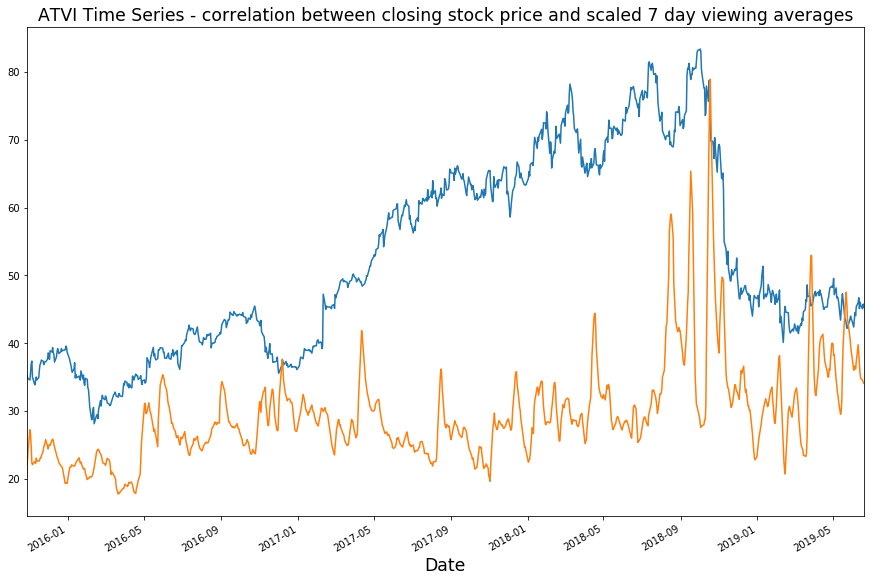

In [9]:
atvi['Close'].plot()
(atvi['7day_averages']/4000).plot()
plt.title('ATVI Time Series - correlation between closing stock price and scaled 7 day viewing averages')
plt.show()

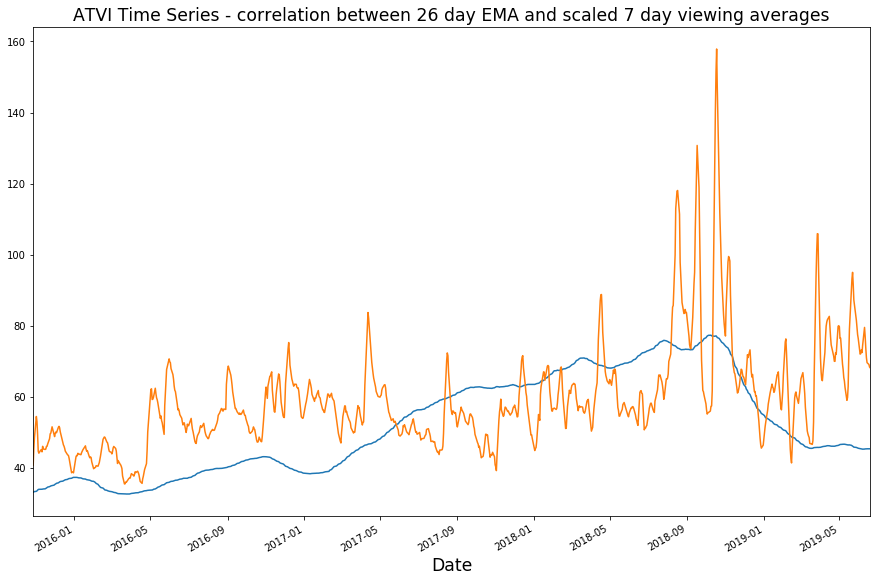

In [10]:
atvi['ema26'].plot()
(atvi['7day_averages']/2000).plot()
plt.title('ATVI Time Series - correlation between 26 day EMA and scaled 7 day viewing averages')
plt.show()

The takeaway from these visualizations it that increases in viewing data correlate with increases in stock price, these correlations are likely due to speculation on the part of analysts.

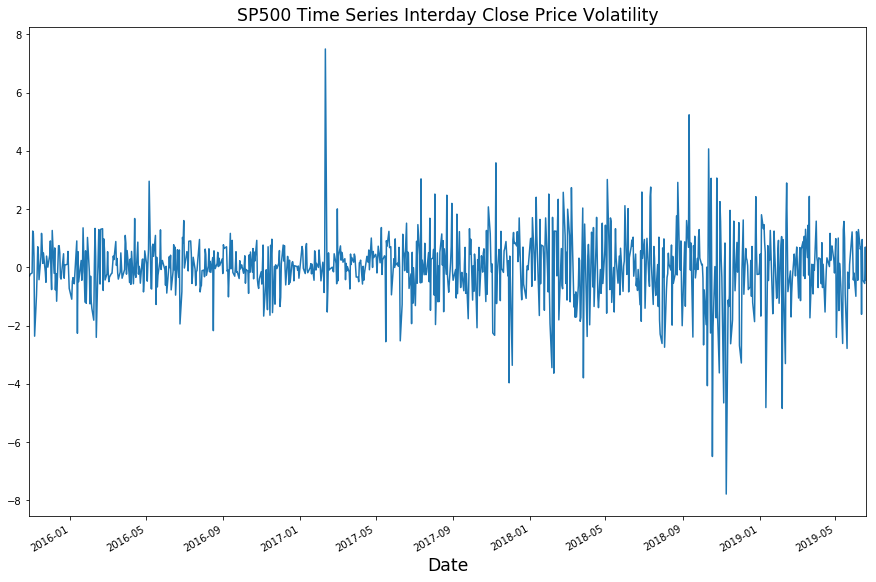

In [11]:
atvi['diff_1'] = atvi['Close'] - atvi['Close'].shift()
atvi.diff_1.plot()
plt.title('SP500 Time Series Interday Close Price Volatility')
plt.show()

Text(0.5, 1.0, 'ATVI PACF')

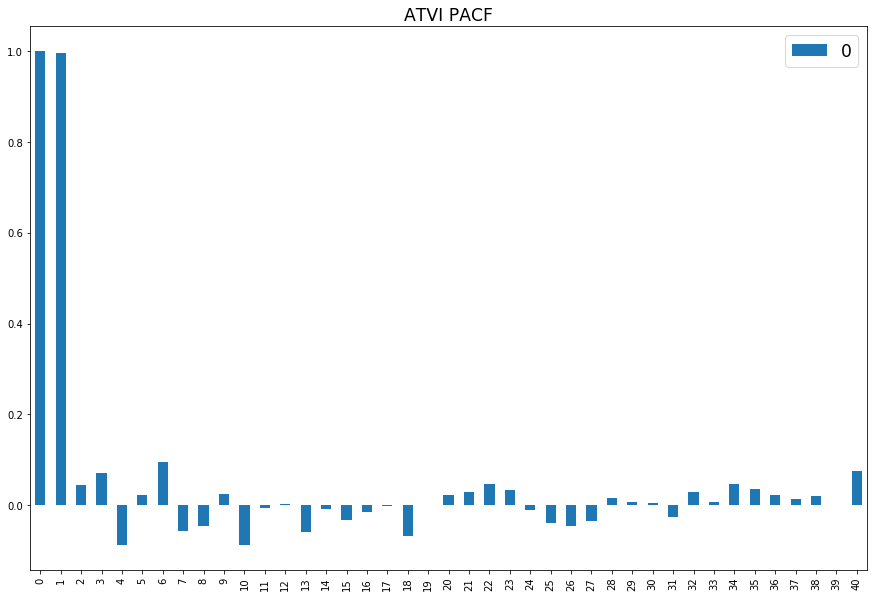

In [12]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(atvi['Close']))
x_acf.plot(kind='bar')
plt.title("ATVI PACF")

The PACF graph above gives us important information on auto-correlation which is important for time series modelling. 
The PACF plot has a significant spike only at lag 1, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 autocorrelation. Accordingly, for our ARIMA model we will use P=1. P is the autoregressive term which states : ......

D is the number of nonseasonable differences need for stationarity of the data and q is the number of lagged forecast errors in the prediction equation. 


In [13]:
#split so last 150 days are test data
atvi_train = atvi.loc[:'2018-11-09']
atvi_test = atvi.loc['2018-11-09':]

As the data is not invertible or stationary we will adapt our models accordingly.

In [14]:
# Generate ARIMA models
from statsmodels.tsa.arima_model import ARIMA

forecast = atvi_test

model = ARIMA(atvi_train['Close'], order=(1,0,1))
model_fit = model.fit()
#get data for next 150 steps
forecast['forecast101'] = model_fit.forecast(steps=151)[0]

model = ARIMA(atvi_train['Close'], order=(1,2,1))
model_fit = model.fit()
#get data for next 150 steps
forecast['forecast121'] = model_fit.forecast(steps=151)[0]

model = ARIMA(atvi_train['Close'], order=(1,2,0))
model_fit = model.fit()
#get data for next 150 steps
forecast['forecast120'] = model_fit.forecast(steps=151)[0]


model = ARIMA(atvi_train['Close'], order=(1,0,2))
model_fit = model.fit()
#get data for next 150 steps
forecast['forecast102'] = model_fit.forecast(steps=151)[0]

model = ARIMA(atvi_train['Close'], order=(1,0,0))
model_fit = model.fit()
#get data for next 150 steps
forecast['forecast100'] = model_fit.forecast(steps=151)[0]


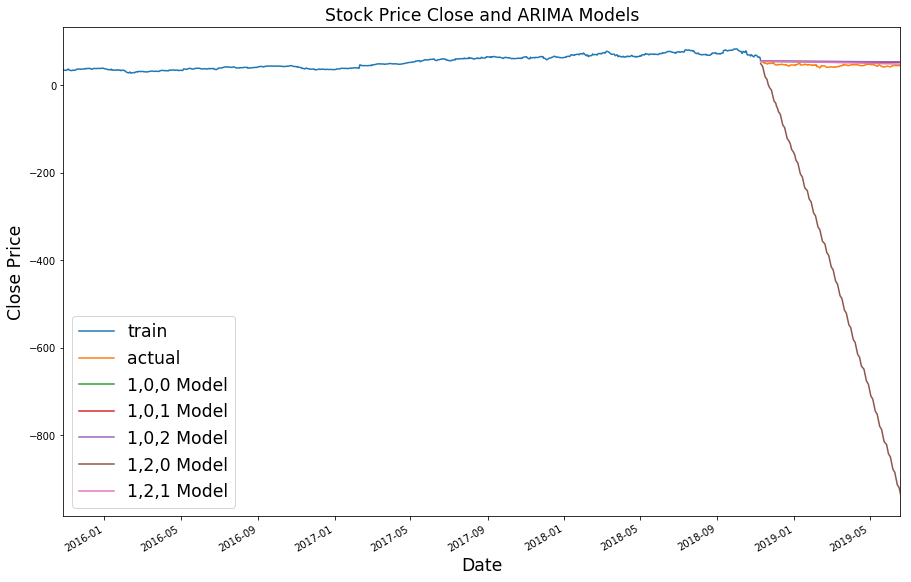

In [15]:
#let's plot our various ARIMA models
atvi_train['Close'].plot(label='train')
atvi_test['Close'].plot(label='actual')
forecast['forecast100'].plot(label='1,0,0 Model')
forecast['forecast101'].plot(label='1,0,1 Model')
forecast['forecast102'].plot(label='1,0,2 Model')
forecast['forecast120'].plot(label='1,2,0 Model')
forecast['forecast121'].plot(label='1,2,1 Model')
plt.title("Stock Price Close and ARIMA Models")
plt.ylabel("Close Price")
plt.legend()
plt.show()

This 1,2,0 model. Does not work at all!! Let's look at the other ones.

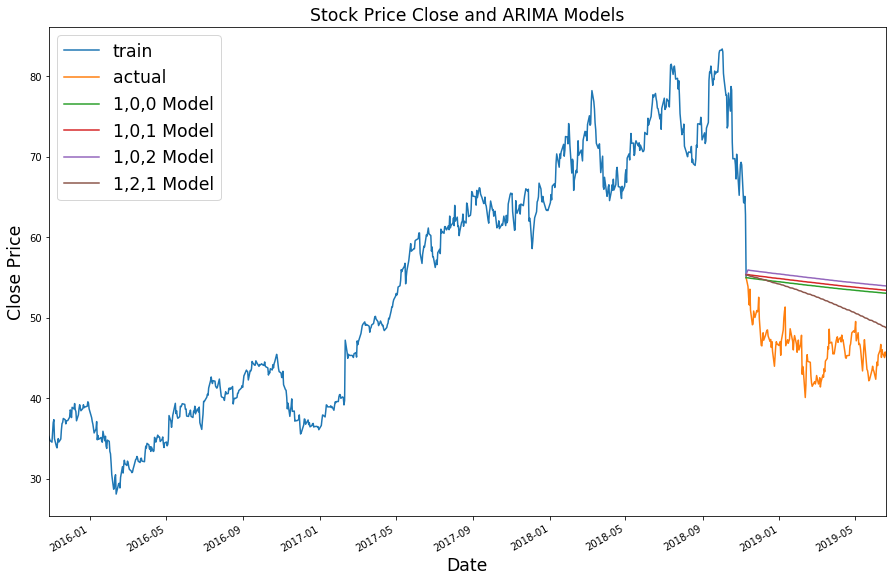

In [16]:
#let's plot our various ARIMA models
atvi_train['Close'].plot(label='train')
atvi_test['Close'].plot(label='actual')
forecast['forecast100'].plot(label='1,0,0 Model')
forecast['forecast101'].plot(label='1,0,1 Model')
forecast['forecast102'].plot(label='1,0,2 Model')
forecast['forecast121'].plot(label='1,2,1 Model')
plt.title("Stock Price Close and ARIMA Models")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In this instance, the 1,2,1 model fits the best. Let's try it over a different time period.

In [17]:
#split so last 150 days are test data
atvi_train = atvi.loc[:'2017-11-09']
atvi_test = atvi.loc['2017-11-09':]

model = ARIMA(atvi_train['Close'], order=(1,2,1))
model_fit = model.fit()
forecast = atvi_test
#get data for next 150 steps
forecast['forecast121'] = model_fit.forecast(steps=403)[0]


In [33]:
#lets get the confidence interval information for this model
confidenceintervals = model_fit.forecast(steps=403)[2]
# get this array into the columns below...
lowerboundary = confidenceintervals[:403,0]
upperboundary = confidenceintervals[:403,1]
atvi_test['ci_lower_boundary'] = lowerboundary
atvi_test['ci_upper_boundary'] = upperboundary


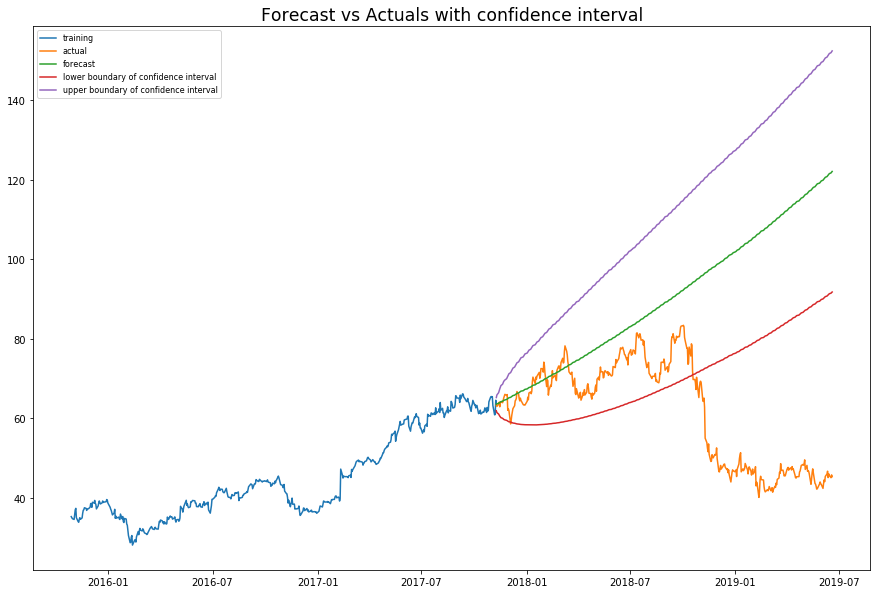

In [38]:
# Plot
plt.plot(atvi_train['Close'], label='training')
plt.plot(atvi_test['Close'], label='actual')
plt.plot(forecast['forecast121'], label='forecast')
plt.plot(atvi_test['ci_lower_boundary'], label='lower boundary of confidence interval')
plt.plot(atvi_test['ci_upper_boundary'], label='upper boundary of confidence interval')
plt.title('Forecast vs Actuals with confidence interval')
plt.legend(loc='upper left', fontsize=8)
plt.show()

These models are highly dependent on longer term trends and the data that they are being fed. They do not catch inter day volatility well. Accordingly, these models are not sufficient to meet our goals.

In [41]:
#let's take a closer look at how these change in these values from week to week correlate with each other in size
atvi['averageviewers_percentagechange'] = ((atvi['7day_averages'] - atvi['7day_averages'].shift(5))/atvi['7day_averages']) * 100

atvi['stockprice_percentagechange'] = ((atvi['Close'] - atvi['Close'].shift(5))/atvi['Close']) * 100

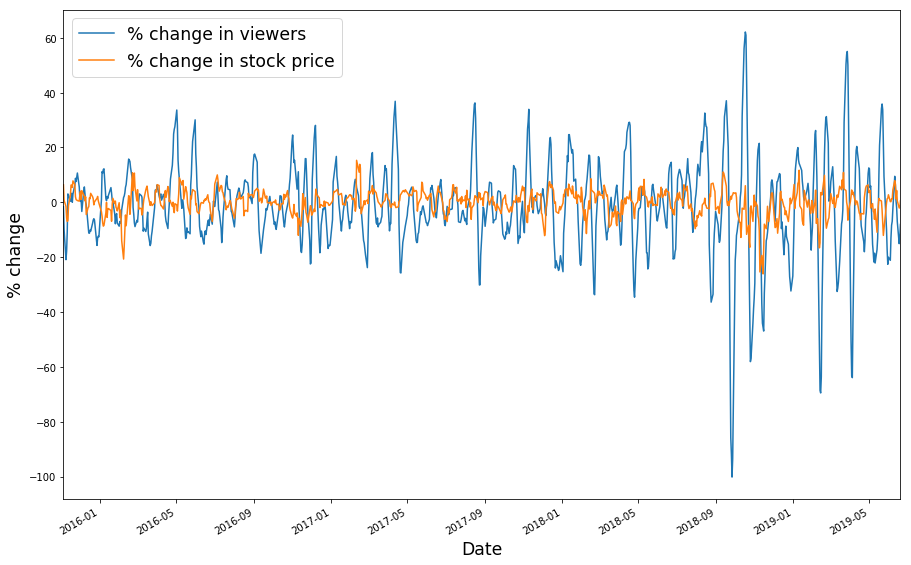

In [43]:
atvi['averageviewers_percentagechange'].loc['2015-11-05':].plot(label='% change in viewers')
atvi['stockprice_percentagechange'].loc['2015-11-05':].plot(label='% change in stock price')
plt.ylabel("% change")
plt.legend()
plt.show()

In [ ]:
The viewership data fluctuates much more than the stock price.

In [ ]:
from scipy.stats import pearsonr
stats.pearsonr(atvi['averageviewers_percentagechange'].loc['2015-11-05':],atvi['stockprice_percentagechange'].loc['2015-11-05':])


They are however very weakly but significantly correlated at the 95% confidence level.

In [60]:
trace = go.Candlestick(x=atvi['Date'],
                open=atvi.Open,
                high=atvi.High,
                low=atvi.Low,
                close=atvi.Close)
data = [trace]
py.iplot(data, filename='atvi_candlestick')